Importamos librerias necesarias

In [1]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt



Cargamos y leemos el csv

In [2]:
df_udemy=pd.read_csv(r'D:udemy_courses.csv')
df_udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


Hacemos un analisis rapido de nuestro csv

In [3]:
df_udemy.info()
df_udemy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


(3678, 12)

In [4]:
df_udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


Eliminamos las columnas que no consideramos necesarias en este analisis rapido

In [5]:
df_udemy.drop('url',axis=1, inplace=True)
df_udemy['num_subscribers'].sort_values(ascending=True)

885          0
456          0
457          0
458          0
459          0
         ...  
3232    114512
2783    120291
3230    121584
3032    161029
2827    268923
Name: num_subscribers, Length: 3678, dtype: int64

Corregimos el tipo de dato en la columna fecha y separamos fecha de horas

In [6]:
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp'], format='%Y-%m-%dT%H:%M:%SZ')
df_udemy['publication_date'] =df_udemy['published_timestamp'].dt.date
df_udemy.drop('published_timestamp', axis=1, inplace=True)
df_udemy['publication_date'] = pd.to_datetime(df_udemy['publication_date'])


Mostramos los cursos con mayor cantidad de subscriptores

In [7]:
df_udemy.sort_values('num_subscribers',ascending=False).head(15)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,publication_date
2827,41295,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,Web Development,2013-02-14
3032,59014,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,Web Development,2013-06-09
3230,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,Web Development,2015-11-02
2783,173548,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,Web Development,2014-04-08
3232,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,Web Development,2016-03-08
1896,19421,Free Beginner Electric Guitar Lessons,False,0,101154,1042,95,Beginner Level,4.5,Musical Instruments,2012-06-15
2589,473160,Web Design for Web Developers: Build Beautiful...,False,0,98867,6512,20,All Levels,3.0,Web Development,2015-04-13
2619,94430,Learn Javascript & JQuery From Scratch,True,30,84897,2685,10,All Levels,2.0,Web Development,2013-10-10
3289,130064,Practical PHP: Master the Basics and Code Dyna...,False,0,83737,4598,45,All Levels,6.5,Web Development,2014-07-19
3247,364426,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5,Web Development,2015-03-12


Dividimos nuestro data set en Exito vs Fracasos tomando como referencia la media de la cantidad de subs

In [8]:
mediana_subscribers = df_udemy['num_subscribers'].median()
df_udemy_succs = df_udemy[df_udemy['num_subscribers'] > mediana_subscribers].copy()
df_udemy_fails= df_udemy[df_udemy['num_subscribers'] < mediana_subscribers].copy()
mediana_subscribers

911.5

Cromrpobamos consistencias con un shape

In [9]:
df_udemy_succs.shape


(1839, 11)

In [10]:
df_udemy_fails.shape

(1839, 11)

Creamos nuestra nube de palabras para los exitos y los fracasos respectivamente.

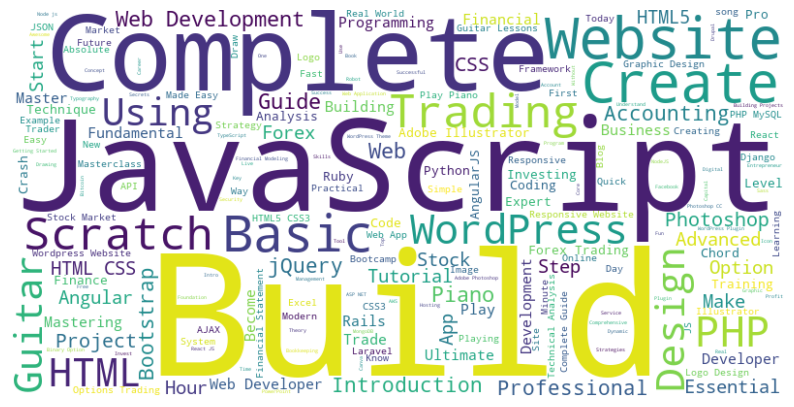

In [11]:
from wordcloud import WordCloud, STOPWORDS


# Unir los valores de las columnas 'course_title' y 'subject' en una sola cadena
text = ' '.join(df_udemy_succs['course_title'])

stopwordsv = set(STOPWORDS)
stopwordsv.update(['learn', 'course', 'beginner', 'beginners'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwordsv).generate(text)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

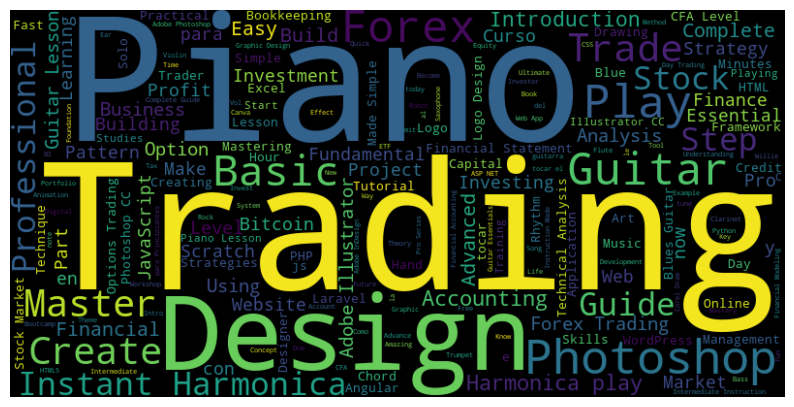

In [12]:
text = ' '.join(df_udemy_fails['course_title'])# + ' ' + ' '.join(df_udemy_exit['subject'])
stopwordsv = set(STOPWORDS)
stopwordsv.update(['learn', 'course', 'beginner', 'beginners', 'aprende','de'])


# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwordsv).generate(text)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
df_udemy_succs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1839 entries, 0 to 3673
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   course_id         1839 non-null   int64         
 1   course_title      1839 non-null   object        
 2   is_paid           1839 non-null   bool          
 3   price             1839 non-null   int64         
 4   num_subscribers   1839 non-null   int64         
 5   num_reviews       1839 non-null   int64         
 6   num_lectures      1839 non-null   int64         
 7   level             1839 non-null   object        
 8   content_duration  1839 non-null   float64       
 9   subject           1839 non-null   object        
 10  publication_date  1839 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 159.8+ KB


Exportamos ambos dataframes como archivos csv.

In [14]:
#df_udemy_succs.to_csv('Udemy_succs.csv', index=False)
#df_udemy_fails.to_csv('Udemy_fails.csv', index=False)

In [15]:
df_udemy.to_csv('Udemy_all.csv', index=False)